# Daniel Siedersberger

O dataset analisado possui uma grande quantidade de filmes, porém muitos deles não tinham votos suficientes para serem analisados com confiança em relação a suas notas médias. 

Existem gêneros que possuem diversos filmes produzidos, porém não são necessariamente os mais populares, em alguns casos, temos poucos filmes produzidos em determinado gênero, mas esses possuem um alto número de votos.
O gênero de guerra teve a maior popularidade (total_de_votos / numero_de_filmes), enquanto que Comédia e Ação tiveram uma maior quantidade de filmes.

A comparação entre os gêneros deve ser realizada com cuidado, pois mesmo com a visualização de gráficos indicando algo, os gêneros podem não ser comparáveis. Para aumentar a acuracia das comparações existem diversos testes que podem ser utilizados para cada caso.

A correlação entre os gêneros e a nota média nos mostra a tendência de determinado gênero aumentar ou diminuir a nota média dos filmes. No caso desta análise, concluí-se que os dois gêneros que mais aumentam a nota média são Drama e Crime, enquanto que Action e Comedy diminuem.

Por fim, quando se analisa a variação das variaveis no tempo, tem-se que tomar cuidado com o número de filmes que cada periodo possui. Isso porque as notas médias são bastante instáveis quando poucos filmes são considerados. 


## Pergunta: Coloque um cabeçalho nesse notebook com o seu nome e resumindo o que descobriu ao explorar esses dados

## Formação Data Science Alura - Análise exploratória do MovieLens

Na formação de Data Science da www.alura.com.br um dos conjuntos de dados que utilizamos é o de avaliações para filmes no site MovieLens. Neste projeto faremos uma análise exploratória desses dados.

### Dicas para o projeto completo:

- todo gráfico deve ter um título, labels e legendas que fazem sentido
- configure um tamanho adequado para os gráficos
- utilize as versões dos arquivos de dados disponíveis no github

## Pergunta: conferindo as versões utilizadas

- Devemos usar pandas 0.24.0 ou mais recente
- Devemos usar seaborn 0.9.0 ou mais recente
- Devemos usar scipy 1.2.0 ou mais recente

In [1]:
# !pip install pandas=="0.24.0" --quiet
# !pip install seaborn=="0.9.0" --quiet
# !pip install scipy=="1.2.0" --quiet

In [2]:
import pandas as pd
import seaborn as sns
import scipy

print("Usando pandas %s" % pd.__version__)
print("Usando seaborn %s" % sns.__version__)
print("Usando scipy %s" % scipy.__version__)

Usando pandas 0.24.0
Usando seaborn 0.9.0
Usando scipy 1.2.0


## Pergunta: carregue os filmes

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv` devem ser carregado em `filmes`
- renomeie as colunas para `filmeId`, `titulo` e `generos`
- configure o indice (`index`) para ser o `filmeId`

In [3]:
# solução
uri = "https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/movies.csv"
filmes = pd.read_csv(uri)

colunas_renomeadas = {
    'movieId':'filmeId',
    'title': 'titulo',
    'genres': 'generos'
}

filmes = filmes.rename(columns=colunas_renomeadas)
filmes.set_index('filmeId', inplace=True)

In [4]:
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [5]:
print("Carregamos %d filmes" % len(filmes))
if(len(filmes) != 9742):
    print("ERRO! O conjunto de dados que estamos trabalhando nesse projeto possui 9742 elementos.")

Carregamos 9742 filmes


Vamos extrair o ano dos filmes (código já pronto): 

In [6]:
ano_de_lancamento = filmes.titulo.str.extract("\((\d{4})\)")
filmes['ano_de_lancamento'] = ano_de_lancamento.astype(float)
filmes.head()

,titulo,generos,ano_de_lancamento
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0
5,Father of the Bride Part II (1995),Comedy,1995.0


## Pergunta: carregando as notas

- os dados `https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv` devem ser carregado em `notas`
- renomeie as colunas para `usuarioId`, `filmeId`, `nota` e `momento`

In [7]:
# solução
uri = "https://raw.githubusercontent.com/alura-cursos/formacao-data-science/master/ratings.csv"
notas = pd.read_csv(uri)

colunas_renomeadas = {
    'movieId': 'filmeId',
    'userId': 'usuarioId',
    'rating': 'nota',
    'timestamp':'momento'
}

notas = notas.rename(columns=colunas_renomeadas)

In [8]:
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
notas.describe().round(2)

,usuarioId,filmeId,nota,momento
count,100836.00,100836.00,100836.00,1.008360e+05
mean,326.13,19435.30,3.50,1.205946e+09
std,182.62,35530.99,1.04,2.162610e+08
min,1.00,1.00,0.50,8.281246e+08
25%,177.00,1199.00,3.00,1.019124e+09
50%,325.00,2991.00,3.50,1.186087e+09
75%,477.00,8122.00,4.00,1.435994e+09
max,610.00,193609.00,5.00,1.537799e+09


## Pergunta: gere uma nova feature, a média dos votos por filme

- crie uma nova coluna chamada `nota_media` dentro do dataframe `filmes`

Dicas:
- como filmeId já é o indice de seu dataframe filmes, se você possui uma série com o número de votos por filme, basta atribuir uma nova coluna normalmente que será usado o mesmo índice

In [10]:
# solução
nota_media_por_filme = notas.groupby(['filmeId']).mean()
filmes['nota_media'] = nota_media_por_filme.nota
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429


## Pergunta: remova os filmes com menos de 50 avaliações

- conte o número de notas por filme
- adicione uma coluna nova chamada `total_de_votos` a `filmes` que representa o número de avaliações que aquele filme teve no conjunto de dados
- remova os que tem 49 ou menos de `filmes`

## Solução

In [11]:
# solução para calcular o total de votos por filme

total_de_votos = notas.groupby(['filmeId']).count()
filmes['total_de_votos'] = total_de_votos.nota
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,2.357143,7.0
5,Father of the Bride Part II (1995),Comedy,1995.0,3.071429,49.0


In [12]:
filmes.shape

(9742, 5)

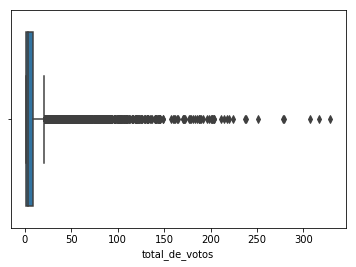

In [13]:
sns.boxplot(filmes.total_de_votos)

In [14]:
# solução para criar a nova coluna e filtrar os filmes
filmes = filmes.query('total_de_votos >= 50')
filmes.shape

(450, 5)

In [15]:
filmes.head()

,titulo,generos,ano_de_lancamento,nota_media,total_de_votos
filmeId,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,3.920930,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,3.431818,110.0
3,Grumpier Old Men (1995),Comedy|Romance,1995.0,3.259615,52.0
6,Heat (1995),Action|Crime|Thriller,1995.0,3.946078,102.0
7,Sabrina (1995),Comedy|Romance,1995.0,3.185185,54.0


# Visualizando os dados gerais

## Pergunta: Visualize as notas médias

- histograma
- cummulative distribution function

Dicas:

- lembre-se de colocar um título nas imagens além de nomes nos eixos x e y
- para gerar a versão cumulativa lembre-se de usar os parâmetros `hist_kws` e `kde_kws` para definir `'cumulative'=True`

In [16]:
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_palette("deep")

Text(0,0.5,'frequência')

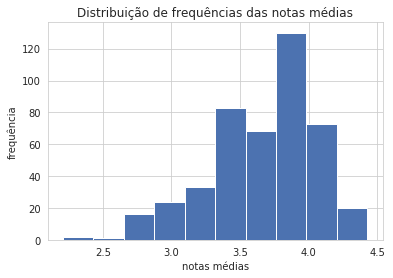

In [17]:
# solução histograma

fig = plt.figure()
ax = plt.subplot()

ax.hist(filmes.nota_media)
ax.set_title('Distribuição de frequências das notas médias')
ax.set_xlabel('notas médias')
ax.set_ylabel('frequência')

Text(0,0.5,'número de filmes')

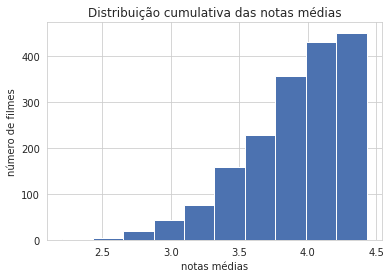

In [18]:
# solução cumulativa

fig = plt.figure()
ax = plt.subplot()

ax.hist(filmes.nota_media,  cumulative=1)
ax.set_title('Distribuição cumulativa das notas médias')
ax.set_xlabel('notas médias')
ax.set_ylabel('número de filmes')

## Pergunta: Visualize o total de votos

- histograma
- cummulative distribution function

Text(0,0.5,'frequência')

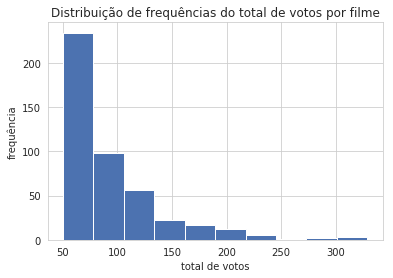

In [19]:
# solução histograma

fig = plt.figure()
ax = plt.subplot()

ax.hist(filmes.total_de_votos)
ax.set_title('Distribuição de frequências do total de votos por filme')
ax.set_xlabel('total de votos')
ax.set_ylabel('frequência')

Text(0,0.5,'numéro de filmes')

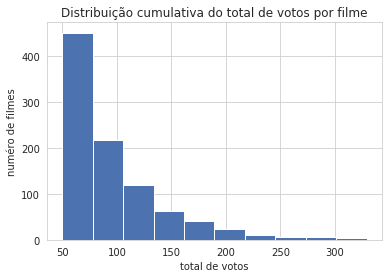

In [20]:
# solução cumulativa

fig = plt.figure()
ax = plt.subplot()

ax.hist(filmes.total_de_votos, cumulative=-1)
ax.set_title('Distribuição cumulativa do total de votos por filme')
ax.set_xlabel('total de votos')
ax.set_ylabel('numéro de filmes')

## Pergunta: 20% dos filmes do dataframe tem nota maior que? 

- lembre-se da função `quantile` do pandas

In [21]:
# solução
nota_limite_dos_20_porcento = filmes.nota_media.quantile(0.8)

In [22]:
print("20 porcento dos filmes tem nota maior que de %.2f" % nota_limite_dos_20_porcento)

20 porcento dos filmes tem nota maior que de 3.99


## Vamos separar a coluna `generos` em diversas colunas.

- O código já está pronto.

In [23]:
filmes['generos'] = filmes['generos'].str.replace('-', '')
generos = filmes['generos'].str.get_dummies()
print("Temos %d generos distintos" % generos.shape[1])

Temos 19 generos distintos


In [24]:
filmes = filmes.join(generos).drop(columns=['generos'], axis=1)
filmes.head()

,titulo,ano_de_lancamento,nota_media,total_de_votos,Action,Adventure,Animation,Children,Comedy,Crime,...,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
filmeId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1995.0,3.920930,215.0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1995.0,3.431818,110.0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),1995.0,3.259615,52.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
6,Heat (1995),1995.0,3.946078,102.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
7,Sabrina (1995),1995.0,3.185185,54.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


## Pergunta: visualização de quantos filmes existem por genero

- Para cada um dos generos você deve agrupar o número de filmes
- Ordene as barras, na esquerda o genero com mais filmes, na direita o que tem menos filmes

Dica:

- Para fazer a soma de uma ou mais colunas individualmente você pode usar `seu_dataframe.sum()`
- Não precisa usar o dataframe `filmes`, somente o dataframe `generos`
- Em certas situações é mais fácil usar as funções de plotagem do pandas ao invés do seaborn

In [25]:
filmes_por_genero = generos.sum().sort_values()
filmes_por_genero

Documentary      2
FilmNoir         4
Western         12
War             19
Musical         21
Horror          26
IMAX            28
Animation       32
Mystery         38
Children        47
Fantasy         66
Romance         85
Crime           87
SciFi           92
Thriller       121
Adventure      132
Action         164
Drama          166
Comedy         181
dtype: int64

Text(0.5,0,'número de filmes')

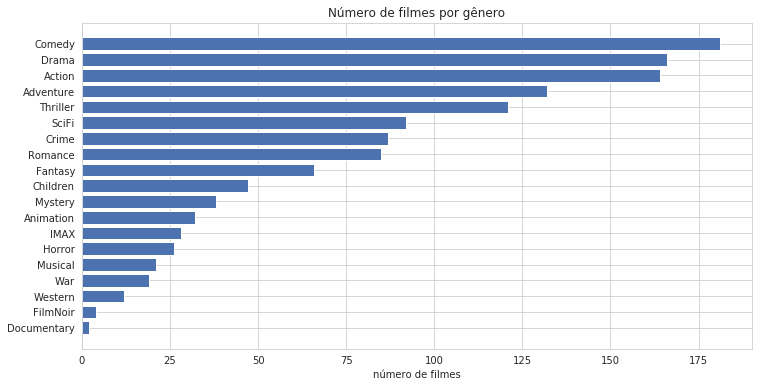

In [26]:
# solução
fig = plt.figure(figsize=(12,6))
ax = plt.subplot()

ax.barh(filmes_por_genero.keys(), filmes_por_genero)
ax.set_title('Número de filmes por gênero')
ax.set_xlabel('número de filmes')

## Pergunta: Quais são os 5 generos com mais filmes?

Dica:

- `sort_values()` pode ordenar uma Series do pandas

In [27]:
# solução
top5_generos_em_quantidade_de_filmes = filmes_por_genero.tail(5).sort_values(ascending=False)

In [28]:
print(top5_generos_em_quantidade_de_filmes)

Comedy       181
Drama        166
Action       164
Adventure    132
Thriller     121
dtype: int64


## Pergunta: visualização de votos por genero

- o código que gera os votos por genero já está pronto
- ordene as categorias da mais visualizada para a menos visualizada
- gere a visualização por genero

In [29]:
votos_por_genero_por_filme = pd.DataFrame((generos.values.T * filmes['total_de_votos'].values).T, columns = generos.columns)
votos_por_genero_por_filme

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,FilmNoir,Horror,IMAX,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,0.0,215.0,215.0,215.0,215.0,0.0,0.0,0.0,215.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,110.0,0.0,110.0,0.0,0.0,0.0,0.0,110.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0
3,102.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,102.0,0.0,0.0
4,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0
5,132.0,132.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,132.0,0.0,0.0
6,0.0,0.0,0.0,0.0,70.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,82.0,0.0,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
# solucão
votos_por_genero = votos_por_genero_por_filme.sum().sort_values()
votos_por_genero

Documentary      108.0
FilmNoir         291.0
Western          900.0
Musical         1822.0
War             2113.0
Horror          2215.0
IMAX            2492.0
Animation       3066.0
Mystery         3452.0
Children        4331.0
Fantasy         5993.0
Romance         7444.0
Crime           8649.0
SciFi           8989.0
Thriller       11907.0
Adventure      13117.0
Comedy         15330.0
Drama          15445.0
Action         15734.0
dtype: float64

Text(0.5,0,'número de votos')

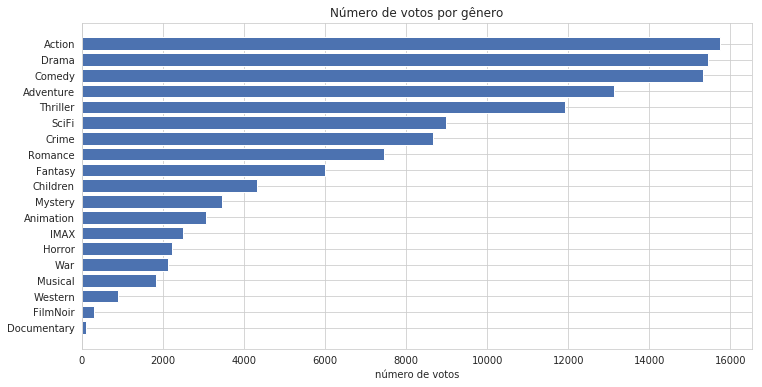

In [31]:
# solução
fig = plt.figure(figsize=(12,6))
ax = plt.subplot()

ax.barh(votos_por_genero.keys(), votos_por_genero)
ax.set_title('Número de votos por gênero')
ax.set_xlabel('número de votos')


In [32]:
top5_generos_em_quantidade_de_votos = votos_por_genero.tail(5).sort_values(ascending=False)
top5_generos_em_quantidade_de_votos

Action       15734.0
Drama        15445.0
Comedy       15330.0
Adventure    13117.0
Thriller     11907.0
dtype: float64

## Pergunta : votos por filme por genero

Queremos entender a quantidade de votos em relação a quantidade de filmes existentes naquele genero.

Por exemplo: 
- se temos 1000 votos de `Ação` e 10 filmes desse genero, foram 100 votos por filme nesse genero.
- se o gênero `Documentário` tem 2 filmes e 500 votos, ele tem 250 votos por filme nesse gênero.

Queremos entender isso, a "popularidade" média de um filme em cada categoria, isto é, o número de votos dividido pelo número de filmes, organizado para cada categoria.

- Você já possui o número de votos por genero
- Calcule o número de votos por genero dividido pelo total de filmes por genero
- Ordene do maior para o menor
- Plote um gráfico para visualizarmos esses dados

In [33]:
votos_por_genero.head()

Documentary     108.0
FilmNoir        291.0
Western         900.0
Musical        1822.0
War            2113.0
dtype: float64

In [34]:
filmes_por_genero.head()

Documentary     2
FilmNoir        4
Western        12
War            19
Musical        21
dtype: int64

In [35]:
# solucao código
popularidade = votos_por_genero/filmes_por_genero
popularidade = popularidade.sort_values(ascending=False)
popularidade

War            111.210526
Crime           99.413793
Adventure       99.371212
Thriller        98.404959
SciFi           97.706522
Action          95.939024
Animation       95.812500
Drama           93.042169
Children        92.148936
Mystery         90.842105
Fantasy         90.803030
IMAX            89.000000
Romance         87.576471
Musical         86.761905
Horror          85.192308
Comedy          84.696133
Western         75.000000
FilmNoir        72.750000
Documentary     54.000000
dtype: float64

Text(0.5,0,'número médio de votos por filme')

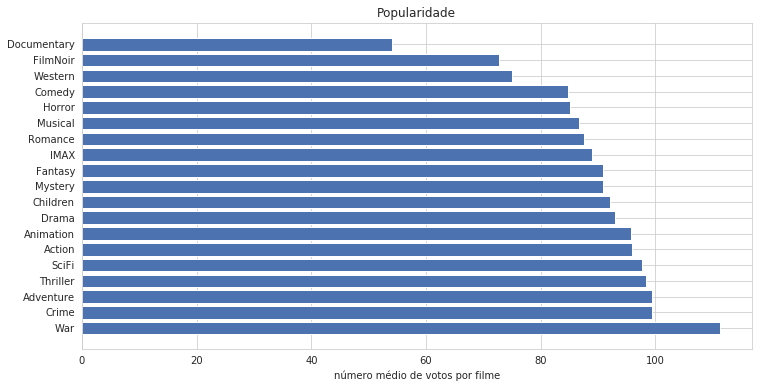

In [36]:
# solução com visualização 
fig = plt.figure(figsize=(12,6))
ax = plt.subplot()

ax.barh(popularidade.keys(), popularidade)
ax.set_title('Popularidade')
ax.set_xlabel('número médio de votos por filme')

## Pergunta: Olhando as 3 últimas visualizações o que você conclui sobre os generos `Action` e `War`?

### Solução (texto livre):
    
    Embora o gênero de filmes de ação tenha uma maior quantidade de votos, os filmes de guerra são, em média, mais populares do que os filmes de ação. Isso porque existem muito mais filmes de ação do que de guerra, mas geralmente os de guerra são mais votados.

## Pergunta: Crie 2 boxplots no mesmo plot comparando a coluna `total_de_votos` dos filmes de categoria `Horror` e `Adventure`  

Dica:

- as vezes é mais fácil usar o boxplot do matplotlib ao invés do seaborn
- plt.boxplot suporta o parâmetro labels com uma lista de nomes para cada boxplot plotado

Text(0,0.5,'total de votos')

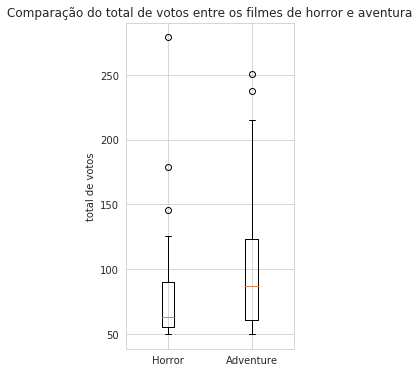

In [37]:
# solução:
categoria_horror = filmes.query('Horror==1')
categoria_adventure = filmes.query('Adventure==1')

fig = plt.figure(figsize=(3,6))
ax = plt.subplot()

ax.boxplot([categoria_horror.total_de_votos, categoria_adventure.total_de_votos], labels=['Horror', 'Adventure'])
ax.set_title('Comparação do total de votos entre os filmes de horror e aventura')
ax.set_ylabel('total de votos')

## Pergunta: mostre agora um boxplot para cada uma das categorias

Dica:
- use generos.columns para acessar todos os gêneros
- já removemos os hífens dos nomes das colunas quando criamos as colunas de gêneros
- plt (pyplot) do matplotlib suporta a função xticks(rotation=90) para rotacionar os labels

Text(0.5,0,'total de votos por filme')

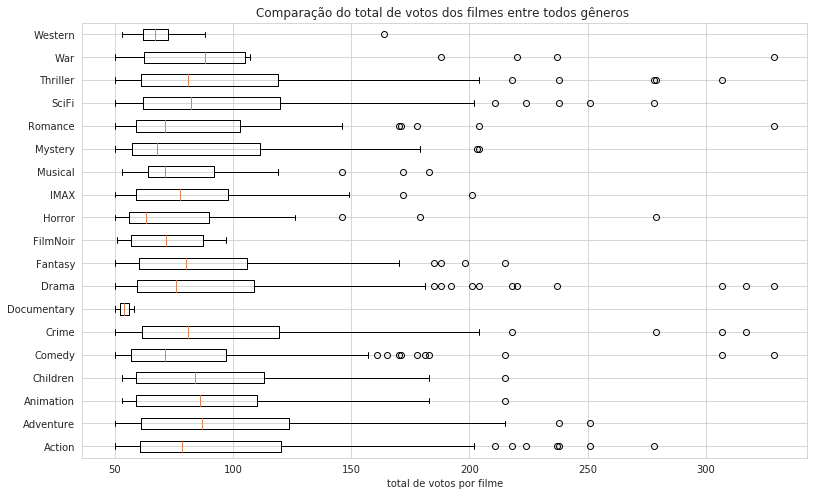

In [38]:
fig = plt.figure(figsize=(13,8))
ax = plt.subplot()

ax.boxplot([filmes[filmes[i] > 0].total_de_votos for i in generos.columns], vert=False, labels=generos.columns)
ax.set_title('Comparação do total de votos dos filmes entre todos gêneros ')
ax.set_xlabel('total de votos por filme')

## Pergunta: desejo criar um filme com somente um dos gêneros: `Horror` ou `Adventure`. Quero ter uma chance maior de ter um faturamento que pague minhas contas, mesmo que não seja um super sucesso absurdo de vendas. Qual dos 2 gêneros você sugere?

### Solução:
    
Sugiro criar um filme do gênero Adventure, pois de acordo com o boxplot sua popularidade tende a ser mais alta que as dos filmes de horror.

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição dos votos dos filmes de `Adventure` e `Horror`. Sua recomendação continua a mesma? Explique.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

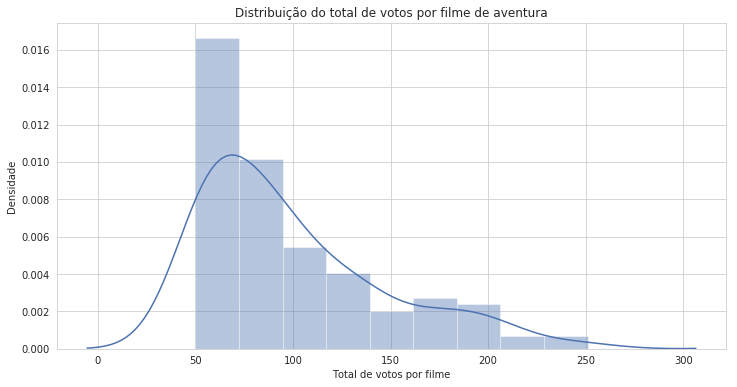

In [39]:
# solucao histograma de aventura

ax = sns.distplot(categoria_adventure.total_de_votos)
ax.set(xlabel='Total de votos por filme', ylabel='Densidade')
ax.set_title('Distribuição do total de votos por filme de aventura')
ax.figure.set_size_inches(12, 6)


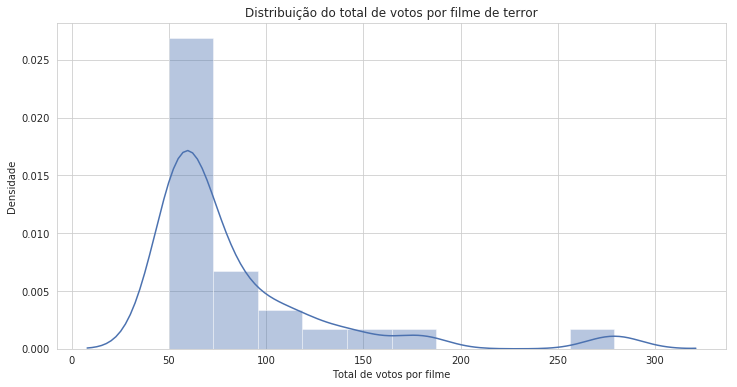

In [40]:
# solucao histograma de horror
ax = sns.distplot(categoria_horror.total_de_votos)
ax.set(xlabel='Total de votos por filme', ylabel='Densidade')
ax.set_title('Distribuição do total de votos por filme de terror')
ax.figure.set_size_inches(12, 6)

In [41]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest

_, p_adventure = normaltest(categoria_adventure.total_de_votos)
_, p_horror = normaltest(categoria_horror.total_de_votos)

print("Os p-values para o teste de normalidade dos gêneros Adventure e Horror são, respectivamente: {:.3f} e {:.3f}"
     .format(p_adventure,p_horror))

Os p-values para o teste de normalidade dos gêneros Adventure e Horror são, respectivamente: 0.000 e 0.000


In [42]:
print("Tamanho da categoria Adventure: %d" % categoria_adventure.shape[0])
print("Tamanho da categoria Horror: %d" % categoria_horror.shape[0])

Tamanho da categoria Adventure: 132
Tamanho da categoria Horror: 26


In [43]:
# solução com o teste desejado
from scipy.stats import ranksums

_, p = ranksums(categoria_adventure.total_de_votos, categoria_horror.total_de_votos)
p

0.04782366231999856

### Solução (explique sua conclusão):

    Conforme os p-values atingidos a partir do normaltest, podemos rejeitar a hipotese nula de que ambas 
    distribuições são normais. Para comparação de duas distribuições não-paramétricas e com tamanho menor 
    que 30, utilizei o método ranksums do scipy. O valor de p-value encontrado no ranksums indica que 
    podemos rejeitar a hipotese de que os dados pertecem a mesma distribuição, concluíndo que os valores 
    de uma distribuição são, em média, maiores do que de outra. Por isso, minha recomendação segue a mesma.

## Pergunta: Faça os mesmos boxplots para as notas médias (`nota_media`) dos gêneros `Adventure` e `Horror`.

Text(0,0.5,'nota média por filme')

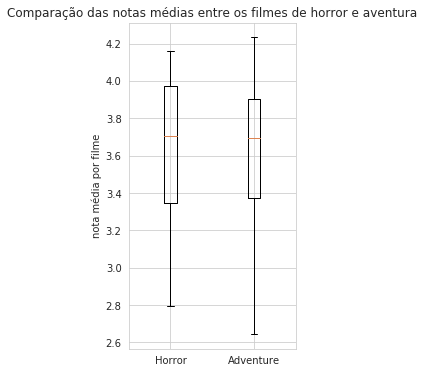

In [44]:
# solução:
fig = plt.figure(figsize=(3,6))
ax = plt.subplot()

ax.boxplot([categoria_horror.nota_media, categoria_adventure.nota_media], labels=['Horror', 'Adventure'])
ax.set_title('Comparação das notas médias entre os filmes de horror e aventura')
ax.set_ylabel('nota média por filme')

Text(0.5,0,'nota média por filme')

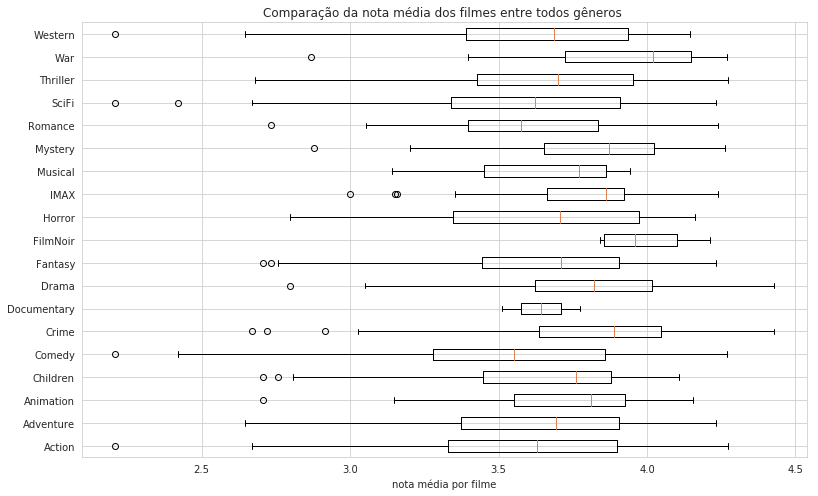

In [45]:
[filmes[filmes[i] > 0] for i in generos.columns]

fig = plt.figure(figsize=(13,8))
ax = plt.subplot()

ax.boxplot([filmes[filmes[i] > 0].nota_media for i in generos.columns], vert=False, labels=generos.columns)
ax.set_title('Comparação da nota média dos filmes entre todos gêneros ')
ax.set_xlabel('nota média por filme')

## Pergunta: Quero fazer um filme que seja sucesso de crítica, com pessoas dando notas altas, mesmo que não tenha um número muito grande de pessoas assistindo. Qual gênero você recomenda se tenho que escolher somente um entre `Adventure` e `Horror`?

### Solução:

Os dois boxplots estão bem parecidos, o que torna a comparação imprecisa. Porém, as notas médias dos filmes de terror parecem possuir uma leve tendência a serem maiores que as dos filmes de aventura. Por isso indico criar um filme de terror.

## Pergunta: nossa análise foi até então visual. Aplique um teste estatístico para verificar se existe significância estatística na distribuição das notas dos filmes de `Adventure` e `Horror`.

Passos:

- visualize a distribuição de ambas através de histogramas
- se suspeitar normalidade na distribuição, faça um teste de normalidade para ambas
- aplique um teste adequado de comparação das distribuições
- explique o resultado encontrado
- utilize p=0.05

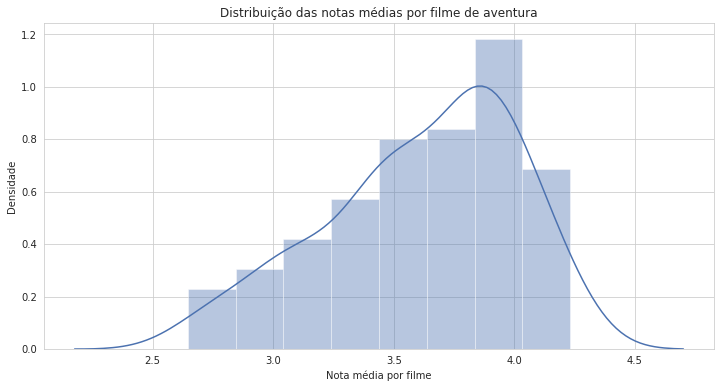

In [46]:
# solucao histograma de aventura

ax = sns.distplot(categoria_adventure.nota_media)
ax.set(xlabel='Nota média por filme', ylabel='Densidade')
ax.set_title('Distribuição das notas médias por filme de aventura')
ax.figure.set_size_inches(12, 6)

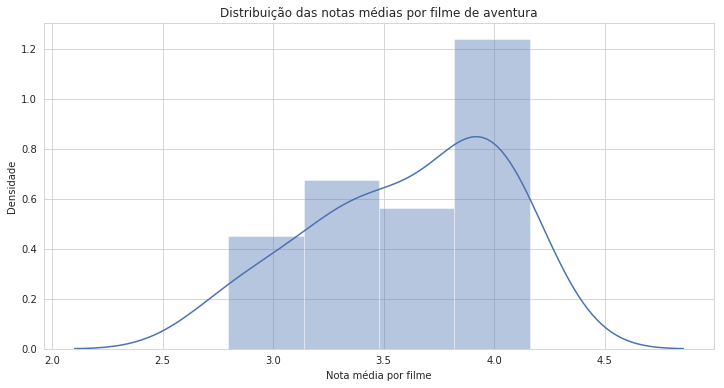

In [47]:
# solucao histograma de horror
ax = sns.distplot(categoria_horror.nota_media)
ax.set(xlabel='Nota média por filme', ylabel='Densidade')
ax.set_title('Distribuição das notas médias por filme de aventura')
ax.figure.set_size_inches(12, 6)

In [48]:
# solucao teste de normalidade ou justificativa para nao utiliza-lo
from scipy.stats import normaltest

_, p_adventure = normaltest(categoria_adventure.nota_media)
_, p_horror = normaltest(categoria_horror.nota_media)

print("Os p-values para o teste de normalidade dos gêneros Adventure e Horror são, respectivamente: {:.3f} e {:.3f}"
     .format(p_adventure,p_horror))

Os p-values para o teste de normalidade dos gêneros Adventure e Horror são, respectivamente: 0.013 e 0.212


In [49]:
# solução com o teste desejado
_, p_nao_parametrico = ranksums(categoria_adventure.nota_media, categoria_horror.nota_media)
p_nao_parametrico

0.8310397344212459

In [50]:
from statsmodels.stats.weightstats import DescrStatsW

descr_adventure = DescrStatsW(categoria_adventure.nota_media)
descr_horror = DescrStatsW(categoria_horror.nota_media)

comparacao = descr_adventure.get_compare(descr_horror)
comparacao.summary(use_t=True)

,coef,std err,t,P>|t|,[0.025,0.975]
subset #1,0.0048,0.085,0.057,0.955,-0.163,0.173


## Sua recomendação para maior sucesso de crítica em nota alta entre `Horror` e `Adventure` continua a mesma? Explique.



### Solução:

Como podemos observar, tanto nas análises visuais quanto nas descritivas, as distribuições dos gêneros Horror e Adventure são muito parecidas. Além disso, com base nos testes de hipotese aplicados, não podemos afirmar que existe um gênero melhor para essa distribuição.

## Pergunta: Quero fazer um filme que seja primeiro sucesso de crítica, com pessoas dando notas altas. Em segundo lugar quero que seja popular (mais pessoas assistam). Com as informações visuais e estatísticas, supondo poder escolher somente um, qual dos 2 gêneros você recomenda agora? `Horror` ou `Adventure`?

### Solução:

Escolheria o gênero aventura, pois em relação as críticas não podemos afirmar qual dos gêneros possuem mais chances de se sair melhor, mas em relação à popularidade sim, podemos. Com isso, considerando  o primeiro critério como empatado, é mais provavel que o genêro aventura tenha maior popularidade.

## Pergunta: Quais são os top 5 filmes dos 2 generos mais assistidas?

- utilize os 2 generos mais votados em `votos_por_genero`
- utilize a `nota_media` para definir o top 5 filmes
- o resultado são 5, não 10 filmes

In [51]:
votos_por_genero

Documentary      108.0
FilmNoir         291.0
Western          900.0
Musical         1822.0
War             2113.0
Horror          2215.0
IMAX            2492.0
Animation       3066.0
Mystery         3452.0
Children        4331.0
Fantasy         5993.0
Romance         7444.0
Crime           8649.0
SciFi           8989.0
Thriller       11907.0
Adventure      13117.0
Comedy         15330.0
Drama          15445.0
Action         15734.0
dtype: float64

In [52]:
# solução: calculando os 2 generos mais votados
dois_generos_mais_assistidos = filmes.query('Action==1 or Drama==1')
dois_generos_mais_assistidos[['Action', 'Drama']]

,Action,Drama
filmeId,,
6,1,0
10,1,0
11,0,1
16,0,1
17,0,1
25,0,1
34,0,1
36,0,1
48,0,1


In [53]:
# solução: encontrando os top 5 filmes desses generos
top_5_filmes_de_action_drama = dois_generos_mais_assistidos.sort_values('nota_media', ascending=False).head(5)
top_5_filmes_de_action_drama[['titulo', 'nota_media', 'total_de_votos', 'Action', 'Drama']]

,titulo,nota_media,total_de_votos,Action,Drama
filmeId,,,,,
318,"Shawshank Redemption, The (1994)",4.429022,317.0,0,1
858,"Godfather, The (1972)",4.289062,192.0,0,1
2959,Fight Club (1999),4.272936,218.0,1,1
1276,Cool Hand Luke (1967),4.271930,57.0,0,1
1221,"Godfather: Part II, The (1974)",4.259690,129.0,0,1


## Pergunta: Quais são os 2 generos com maior valor de correlação com a `nota_media`? E os 2 com menor valor de correlação com a `nota_media`?

- O pandas possui a função `corr` para calcular correlação entre todas as colunas

In [54]:
# solucao
correlacao_entre_generos_e_nota_media = filmes.corr()['nota_media'][generos.columns].sort_values(ascending=False)
correlacao_entre_generos_e_nota_media

Drama          0.277662
Crime          0.190220
Mystery        0.129914
War            0.125615
FilmNoir       0.081766
IMAX           0.064931
Animation      0.043071
Documentary   -0.003486
Musical       -0.008529
Thriller      -0.016782
Fantasy       -0.020986
Children      -0.030360
Horror        -0.033877
Western       -0.059642
Romance       -0.072002
Adventure     -0.079985
SciFi         -0.136717
Action        -0.154089
Comedy        -0.256005
Name: nota_media, dtype: float64

In [55]:
print("Os dois gêneros com maior valor de correlação com a nota média são {} e {}."
     .format(correlacao_entre_generos_e_nota_media.head(2).index[0],
            correlacao_entre_generos_e_nota_media.head(2).index[1]))

print("Os dois gêneros com menor valor de correlação com a nota média são {} e {}."
     .format(correlacao_entre_generos_e_nota_media.tail(2).index[0],
            correlacao_entre_generos_e_nota_media.tail(2).index[1]))

Os dois gêneros com maior valor de correlação com a nota média são Drama e Crime.
Os dois gêneros com menor valor de correlação com a nota média são Action e Comedy.


## Pergunta: Quais são os 2 generos com maior correlação com `total_de_votos`? E quais os 2 com menor correlação com `total_de_votos`?

In [56]:
# solucao
correlacao_entre_generos_e_total_de_votos = filmes.corr()['total_de_votos'][generos.columns].sort_values(ascending=False)
correlacao_entre_generos_e_total_de_votos

Adventure      0.104380
War            0.087999
Thriller       0.085525
Crime          0.079766
Action         0.066239
SciFi          0.063802
Animation      0.023442
Drama          0.018779
Children       0.001764
Mystery       -0.007051
Fantasy       -0.009976
IMAX          -0.016285
Musical       -0.024741
Horror        -0.036132
FilmNoir      -0.039408
Romance       -0.045427
Documentary   -0.055010
Western       -0.060789
Comedy        -0.128527
Name: total_de_votos, dtype: float64

In [57]:
print("Os dois gêneros com maior valor de correlação com total de votos são {} e {}."
     .format(correlacao_entre_generos_e_total_de_votos.head(2).index[0],
            correlacao_entre_generos_e_total_de_votos.head(2).index[1]))

print("Os dois gêneros com menor valor de correlação com total de votos são {} e {}."
     .format(correlacao_entre_generos_e_total_de_votos.tail(2).index[0],
            correlacao_entre_generos_e_total_de_votos.tail(2).index[1]))

Os dois gêneros com maior valor de correlação com total de votos são Adventure e War.
Os dois gêneros com menor valor de correlação com total de votos são Western e Comedy.


## Pergunta: Visualize graficamente o relacionamento entre ano de lançamento e nota média

- Use o gráfico `lineplot`

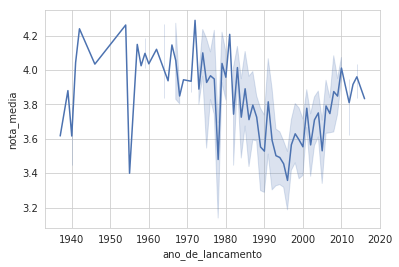

In [58]:
# solucao
sns.lineplot(data=filmes, x='ano_de_lancamento', y='nota_media')

## Pergunta: Interprete a correlação entre `ano_de_lancamento` e a `nota_media`?

- Calcule a correlação numericamente (use o `corr` do pandas)
- Correlação não implica causalidade, qual "problema" na coleta dos dados pode gerar esse tipo de correlação?

In [59]:
# solução (código)
filmes.corr()['ano_de_lancamento']['nota_media']

-0.1591455520444448

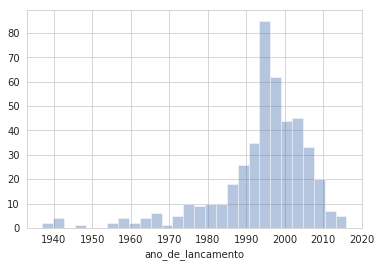

In [60]:
sns.distplot(filmes.ano_de_lancamento, kde=False )

### Solução (explicação)

O coeficiente de correlação mostra que, quanto maior o ano de lançamento, menor as notas médias.
Um possível problema que podemos analisar através do gráfico de distribuição é que existem muito menos filmes antigos que filmes novos em nossa amostra. Isso pode implicar em uma correlação instável para os filmes antigos.

## Pergunta: analise um pairplot

- crie uma variável chamada `infos` baseada nas colunas `ano_de_lancamento`, `nota_media` e `total_de_votos` de `filmes`
- faça o pairplot usando seaborn
- coloque uma regressão linear para cada pequeno plot dentro dele

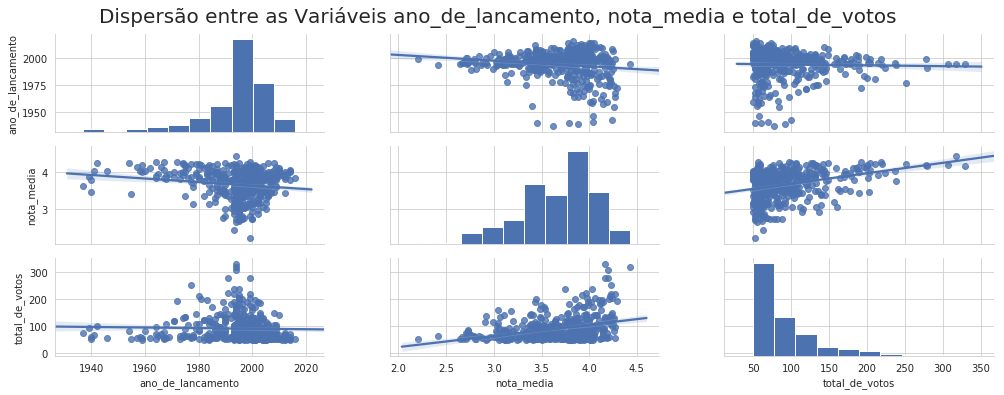

In [61]:
# solução
infos = ['ano_de_lancamento', 'nota_media', 'total_de_votos']
ax = sns.pairplot(data=filmes, y_vars=infos, x_vars=infos, kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis ano_de_lancamento, nota_media e total_de_votos',
                fontsize=20, y=1.05)
ax.fig.set_size_inches((15,5))
ax

## Pergunta: analise um pairplot dos filmes de `Animation`

- use o dataframe `filmes`
- em um único pairplot separe com cores distintas os filmes da categoria `Animation` dos outros
- use uma palete como `husl`
- use marcadores distintos para cada um dos dois grupos
- faça o pairplot usando seaborn e coloque uma regressão linear para cada pequeno plot dentro dele
- tanto em x quanto y use somente três variáveis: `total_de_votos`, `ano_de_lancamento`, `nota_media`

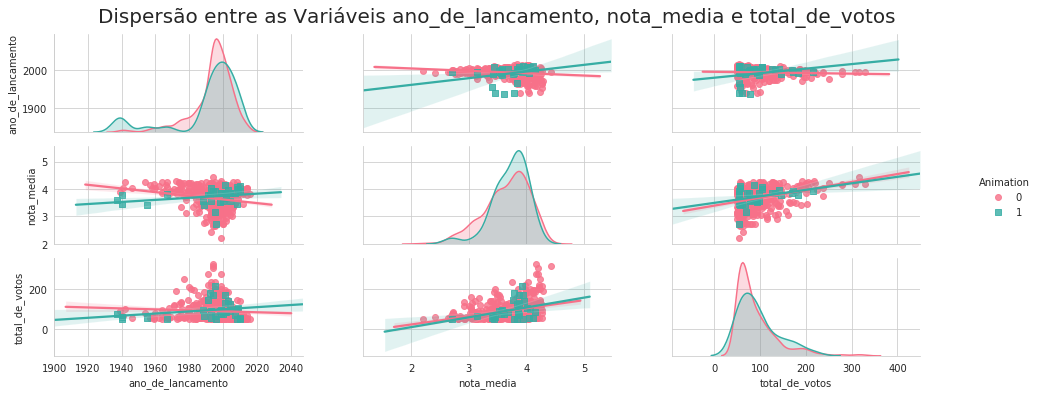

In [62]:
ax = sns.pairplot(data=filmes, y_vars=infos, x_vars=infos, kind='reg', 
                  palette="husl", hue='Animation', markers=["o", "s"])
ax.fig.suptitle('Dispersão entre as Variáveis ano_de_lancamento, nota_media e total_de_votos',
                fontsize=20, y=1.05)
ax.fig.set_size_inches((15,5))
ax

## Pergunta: Analise a regressão em relação ao ano de lançamento.

- Como parece se comportar a `nota_media` de filmes de `Animation` mais antigos e mais recentes? (ano_de_lancamento x nota_media). Essa correlação parece ser baixa, mas parece ser linear?
- E o `ano_de_lancamento` x `total_de_votos`?
- E das outras categorias? Compare isso com os outros filmes.
- O que leva você levantar como hipótese para esse resultado?

### Solução:

1- Parece existir uma correlação positiva entre eles, ou seja, conforme o ano de lançamento aumenta, a nota média também aumenta. Apesar de existirem poucos pontos para filmes antigos e alguns outliers, a correlação da média parece ser linear.

2- Também há uma correlação positiva entre ano_de_lancamento e total_de_votos para os filmes de animação, porém a dispersão do gráfico não parece ser linear.

3- Ao contrário dos filmes de animação, os resultados para as outras categorias são menos positivos, mas ambos possuem o problema de poucos filmes antigos. Por exemplo, ao contrário dos filmes de animação, a nota média do total dos filmes tende a cair ao passar dos anos.

4- No geral, ao passar dos anos, temos mais filmes sendo criados, o que influencia negativamente na nota média, pois quanto maior o numero de filmes, mais dificil será de levantar a média. Para o genêro de animação, minha hipotese é que, ao passar dos anos, os recursos tecnologicos disponiveis para criação dos filmes de animação aumentam, tornando esse gênero cada vez mais interessante.

## Pergunta: Explore

- compartilhe conosco 2 visualizações extras que julgar interessante
- explique o que encontrou
- use quantas células (texto ou código) julgar necessário

### 1 - Relação entre o número de filmes por ano e a média de notas por ano

In [63]:
# solução
nota_media_por_ano = filmes.groupby('ano_de_lancamento').mean()['nota_media']
filmes_por_ano = filmes.groupby('ano_de_lancamento').count()['titulo']

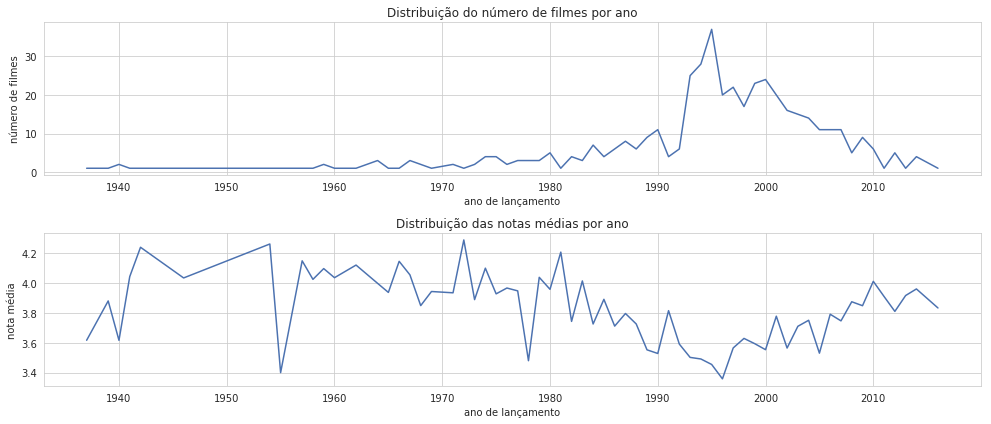

In [64]:
plt.figure(figsize=(14,6))

plt.subplot(2, 1, 1)
plt.plot(filmes_por_ano)
plt.title('Distribuição do número de filmes por ano')
plt.xlabel('ano de lançamento')
plt.ylabel('número de filmes')

plt.subplot(2, 1, 2)
plt.plot(nota_media_por_ano)
plt.title('Distribuição das notas médias por ano')
plt.xlabel('ano de lançamento')
plt.ylabel('nota média')


plt.tight_layout()
plt.show()

## 1 - Conclusão

Como podemos observar, o número de filmes por ano tem uma certa relação com a nota média dos filmes por ano.
Quando se tem poucos filmes, a média tende a ser alta e instável devido a sua sensibilidade. Por outro lado, entre periodo de 1990 à 2000, temos variações e médias menores. Portanto, a comparação das médias entre filmes antigos e novos para essa amostragem pode apresentar conclusões imprecisas.  

## 2 - Considerando os anos com pelo menos 20 filmes, observar a relação do número de votos, nota média e ano de lançamento.

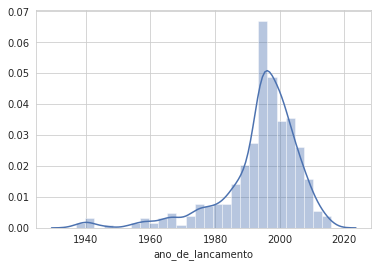

In [65]:
sns.distplot(filmes.ano_de_lancamento)

In [66]:
anos_com_mais_de_10_filmes = filmes_por_ano[filmes_por_ano.values >= 20]
anos_com_mais_de_10_filmes

ano_de_lancamento
1993.0    25
1994.0    28
1995.0    37
1996.0    20
1997.0    22
1999.0    23
2000.0    24
2001.0    20
Name: titulo, dtype: int64

In [67]:
filmes_em_anos_populares = filmes[filmes.ano_de_lancamento.isin(anos_com_mais_de_10_filmes.keys())]
filmes_em_anos_populares.ano_de_lancamento.unique()

array([1995., 1996., 1994., 1993., 1997., 1999., 2000., 2001.])

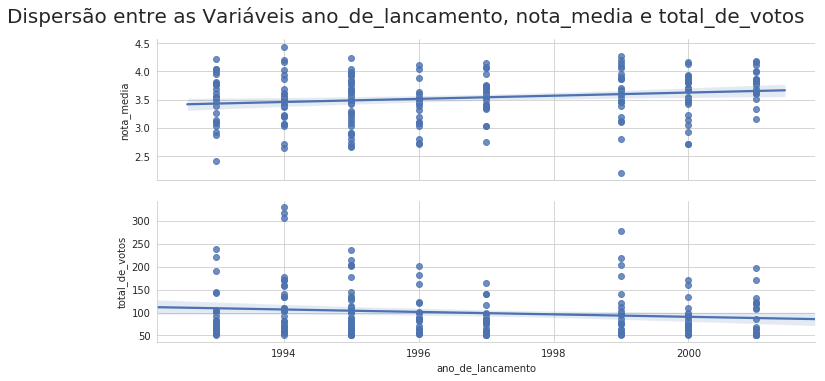

In [68]:
infos = ['nota_media', 'total_de_votos']
ax = sns.pairplot(data=filmes_em_anos_populares, y_vars=infos, x_vars='ano_de_lancamento', kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis ano_de_lancamento, nota_media e total_de_votos',
                fontsize=20, y=1.05)
ax.fig.set_size_inches((15,5))
ax

##  2- Conclusão

Ao contrário da avaliação realizada anteriormente para todos filmes, a notá média tende a aumentar de acordo com o ano de lançamento quando consideramos apenas os anos com pelo menos 20 filmes. Já o total de votos continua com o mesmo comportamento observado anteriormente, confirmando uma tendência de baixa.